In [1]:
# Define imports
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# define the forward function.
def fn(x):
    return 1.0 / 2.0 * (x + 3)**2

In [3]:
# define the gradient.
def gradient(x):
    return (x + 3)

# A helper function to plot the solution for us
def plot_solution(val):

    plt.plot(x, y)
    ax = plt.subplot(1, 1, 1)
    ax.plot(val, fn(val), 'ro')

In [4]:
# setup x and y variables.
x = np.arange(-13, 10)
y = fn(x)

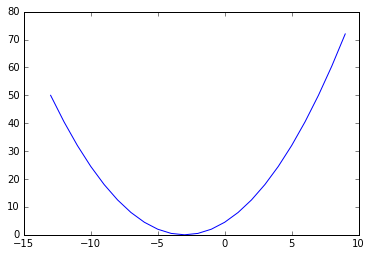

In [5]:
# plot the function.
plt.plot(x, y)

In this seDemonstrate a simple use of SGD to find the minimum of the function.
# take an initial guess at x, let SGD solve for the solution.  We start way off from
# the goal.

In [6]:
learn_rate = 0.5
x0 = 100.0
solutions = []

In [7]:
# SGD update equation is:
# deltax = -1.0 * learn_rate * gradient(x)
# xnew = x + deltax

for iter in xrange(20):
    deltax = -1.0 * learn_rate * gradient(x0)
    xnew = x0 + deltax
    solutions.append(xnew)
    x0 = xnew

-2.99990177155


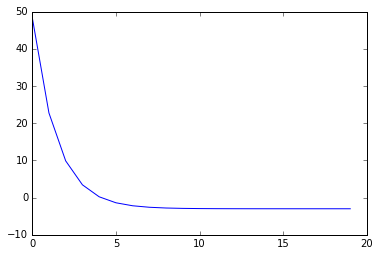

In [8]:
# Looks like we reached the goal pretty fast.
print solutions[-1]
plt.plot(solutions)

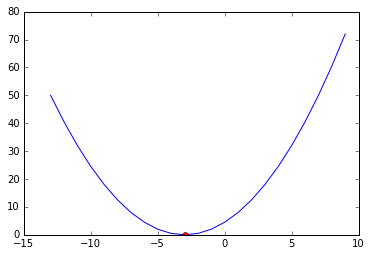

In [9]:
# yay it found the right point!
plot_solution(solutions[-1])

# Exercise: 

* experiment with the learning rate.  Make it larger and make it smaller. See what the effect is on the solution.

In [11]:
# Now illustrate a tougher function, one with multiple saddle points.

def fn(x):
    return x**4 - 2*x**2 + x

In [12]:
def gradient(x):
    return 4 * x**3 - 4*x + 1

In [13]:
x = np.arange(-2, 2, 0.01)
y = fn(x)

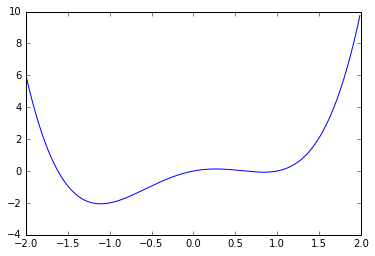

In [14]:
plt.plot(x, y)

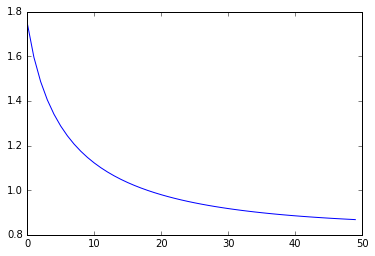

In [15]:
# in this case, we pick a starting point from the right.
# notice how it converges to the wrong point!
learn_rate = 0.01
x0 = 2.0
solutions = []

for iter in xrange(50):
    deltax = -1.0 * learn_rate * gradient(x0)
    xnew = x0 + deltax
    solutions.append(xnew)
    x0 = xnew

plt.plot(solutions)

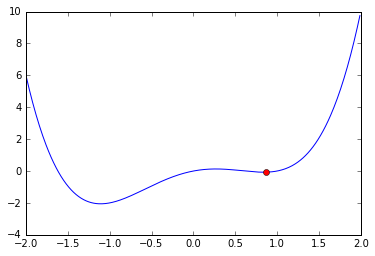

In [16]:
# Oops!  The solver got fooled by a local minimum!
plot_solution(solutions[-1])

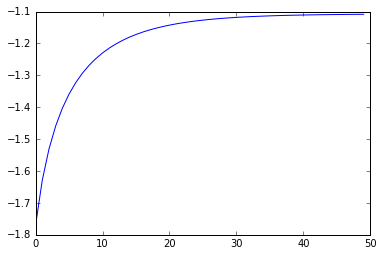

In [17]:
# ok, now what happens if we choose the initial point on the other side?

# in this case, we pick a starting point from the right.
# notice how it converges to the wrong point!
learn_rate = 0.01
x0 = -2.0
solutions = []

for iter in xrange(50):
    deltax = -1.0 * learn_rate * gradient(x0)
    xnew = x0 + deltax
    solutions.append(xnew)
    x0 = xnew


plt.plot(solutions)

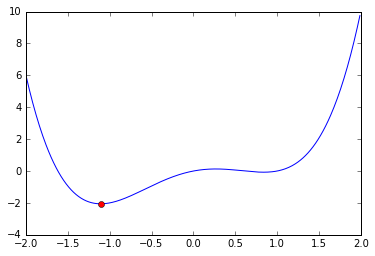

In [18]:
# Ok now we are at the right point!
plot_solution(solutions[-1])

But that sucks!  how do we overcome that?  Momentum to the rescue. x' = x - learn_rate * gradient(x) + alpha * previous_update start from positive x and see if we can pick a value of alpha to overcome the saddle point.

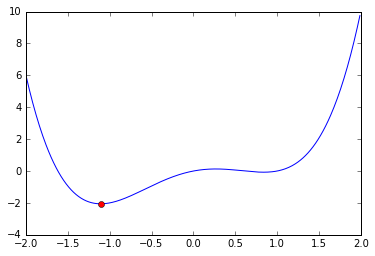

In [19]:
learn_rate = 0.01
alpha = 0.75
x0 = 2.0
solutions = []
previous_deltax = 0.

for iter in xrange(200):
    deltax = -1.0 * learn_rate * gradient(x0) + alpha * previous_deltax
    xnew = x0 + deltax
    solutions.append(xnew)
    previous_deltax = deltax
    x0 = xnew
    

plot_solution(solutions[-1])
# Ok, now we are in business.

# Exercise: 

* Play with alpha.  Experiment with the value of alpha and see how sensitive the solution is.
* Experiment with the start point, start from the left and start from the right.
* Experiment with the learning rate. 

# Newton optimization method
https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization

Taylor series expansion of a function f(x) around a point deltax is:

f(x) = f(x) + f'(x) * deltax + 1/2! f''(x) * deltax^2 + ...

set df(x)/ddeltax = 0:

0 = f'(x) + f''(x) * deltax

solve for deltax:

deltax = -f'(x) / f''(x)

Now let's use this method to solve for the roots of the complex function.

In [22]:
# Hessian is a fancy name for the second derivative.
def hessian(x):
    return 12 * x**2 - 4.

In [23]:
# Start from the Left initially.
eps = 1e-20
x0 = -2.0
solutions = []
previous_deltax = 0.

for iter in xrange(5):
    deltax = -1.0 * gradient(x0) / (hessian(x0) + eps)
    xnew = x0 + deltax
    solutions.append(xnew)
    x0 = xnew

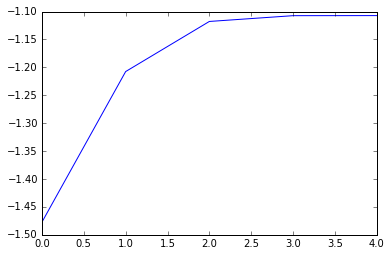

In [24]:
# notice that this method converges very quickly, 5 iterations!
plt.plot(solutions)

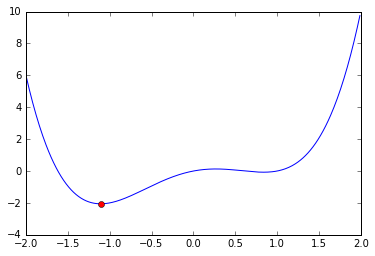

In [25]:
# And it finds the right point.  But remember, we started from the left.
plot_solution(solutions[-1])

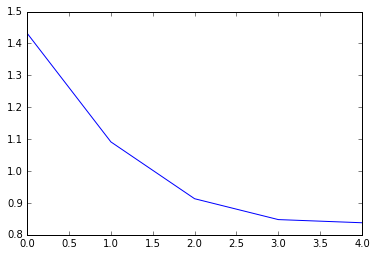

In [90]:
# So what happens if we start from the right?
eps = 1e-20
x0 = 2.0
solutions = []

for iter in xrange(5):
    deltax = -1.0 * gradient(x0) / (hessian(x0) + eps)
    xnew = x0 + deltax
    solutions.append(xnew)
    x0 = xnew

plt.plot(solutions)

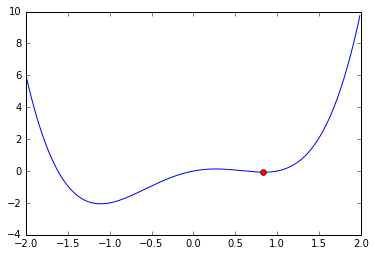

In [91]:
plot_solution(solutions[-1])

Well shoot, it got stuck at the saddle point.  So even though Newtons method converges faster than GD, the problem is "out of the box" its not guaranteed to find the local minimum.

Mind you, neither is GD!  Most of the time in DL applications, the Hessian (and its inverse) are very expensive to compute.  So even though GD has drawbacks, it has proven to be an effective solution for DL applications.

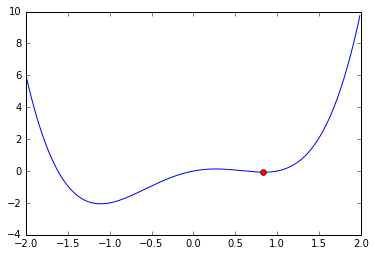

In [82]:
# now let's use keras to try to fit the function with a neural net.
from keras import models
from keras import layers

x = np.arange(-2, 2, 0.01)
y = fn(x)

train_data = x
train_targets = y

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(1,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_45 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________
None


In [83]:
history = model.fit(train_data, train_targets, epochs=5, batch_size=5)

Epoch 1/5
400/400 [==============================] - 0s 615us/step - loss: 4.2578 - mean_absolute_error: 1.4529
Epoch 2/5
400/400 [==============================] - 0s 264us/step - loss: 2.9571 - mean_absolute_error: 1.2670
Epoch 3/5
400/400 [==============================] - 0s 255us/step - loss: 2.3009 - mean_absolute_error: 1.1243
Epoch 4/5
400/400 [==============================] - 0s 273us/step - loss: 1.8566 - mean_absolute_error: 1.0268
Epoch 5/5
400/400 [==============================] - 0s 256us/step - loss: 1.4489 - mean_absolute_error: 0.9091


In [84]:
val_mse, val_mae = model.evaluate(train_data, train_targets, verbose=0)
print val_mse, val_mae

1.3435142457485199 0.9037000608444213


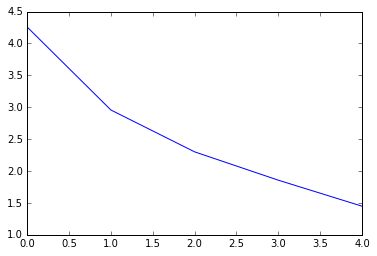

In [86]:
# Plot the training loss
plt.plot(history.history['loss'])

In [87]:
# Generate predictions from the model and compare to the training data
ypredict = model.predict(x)

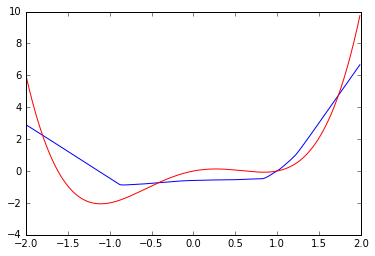

In [88]:
plt.plot(x, ypredict)
ax = plt.subplot(1, 1, 1)
ax.plot(x, y, '-r')

# Exercise: 

* adjust the number of epochs and see if you can get the generated function to match the real function.

* Experiment with the network architecture.  Experiment with using fewer hidden layers or fewer hidden units.  See if you can get good results with a much smaller network.